## HW3: Decision Tree, AdaBoost and Random Forest
In hw3, you need to implement decision tree, adaboost and random forest by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.tree.DecisionTreeClassifier

## Load data
The dataset is the Heart Disease Data Set from UCI Machine Learning Repository. It is a binary classifiation dataset, the label is stored in `target` column. **Please note that there exist categorical features which need to be [one-hot encoding](https://www.datacamp.com/community/tutorials/categorical-data) before fit into your model!**
See follow links for more information
https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

train_file_past = 'train_idx.npy'
#train_file_past = '/content/drive/MyDrive/Image_recognition/HW3/train_idx.npy'
train_idx = np.load(train_file_past)

test_file_past = 'test_idx.npy'
#test_file_past = '/content/drive/MyDrive/Image_recognition/HW3/test_idx.npy'
test_idx = np.load(test_file_past)

train_df = df.iloc[train_idx]
test_df = df.iloc[test_idx]

In [ ]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,54,1,2,192,283,0,2,195,0,0.0,1,1,reversible,0
232,58,0,4,170,225,1,2,146,1,2.8,2,2,fixed,1
233,56,1,2,130,221,0,2,163,0,0.0,1,0,reversible,0
184,46,1,4,120,249,0,2,144,0,0.8,1,0,reversible,0
84,55,0,2,135,250,0,2,161,0,1.4,2,0,normal,0


In [ ]:
labels = train_df['thal'].astype('category').cat.categories.tolist()
replace_map_comp = {'thal' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)
train_df.replace(replace_map_comp, inplace=True)
train_df.head()

{'thal': {'fixed': 1, 'normal': 2, 'reversible': 3}}


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,54,1,2,192,283,0,2,195,0,0.0,1,1,3,0
232,58,0,4,170,225,1,2,146,1,2.8,2,2,1,1
233,56,1,2,130,221,0,2,163,0,0.0,1,0,3,0
184,46,1,4,120,249,0,2,144,0,0.8,1,0,3,0
84,55,0,2,135,250,0,2,161,0,1.4,2,0,2,0


In [ ]:
train_df_data = train_df.values[:,0:-1]
print(train_df_data)
train_df_target = train_df['target'].astype(int).values[:]
print(train_df_target)
print(np.bincount(train_df_target))

[[54.  1.  2. ...  1.  1.  3.]
 [58.  0.  4. ...  2.  2.  1.]
 [56.  1.  2. ...  1.  0.  3.]
 ...
 [64.  1.  1. ...  2.  0.  3.]
 [44.  1.  3. ...  1.  0.  2.]
 [57.  1.  3. ...  1.  0.  2.]]
[0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0]
[138  63]


In [ ]:
labels = test_df['thal'].astype('category').cat.categories.tolist()
replace_map_comp = {'thal' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_df.replace(replace_map_comp, inplace=True)

test_df_data = test_df.values[:,0:-1]
print(test_df_data)
test_df_target = test_df['target'].astype(int).values[:]
print(test_df_target)

[[58.  0.  1. ...  1.  0.  2.]
 [50.  0.  3. ...  2.  0.  2.]
 [57.  0.  4. ...  1.  0.  2.]
 ...
 [57.  1.  4. ...  1.  0.  3.]
 [39.  1.  3. ...  1.  0.  2.]
 [70.  1.  4. ...  2.  3.  2.]]
[0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Question 1
Gini Index or Entropy is often used for measuring the “best” splitting of the data. Please compute the Entropy and Gini Index of provided data. Please use the formula from [page 5 of hw3 slides](https://docs.google.com/presentation/d/1kIe_-YZdemRMmr_3xDy-l0OS2EcLgDH7Uan14tlU5KE/edit#slide=id.gd542a5ff75_0_15)

In [ ]:
import math

def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row # label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts
def gini(sequence):
    # Counts the number of each type of example in a dataset.
    counts = class_counts(sequence)
    # Calculate impurity
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(sequence))
        impurity -= prob_of_lbl**2
    return impurity

def entropy(sequence):
    # Counts the number of each type of example in a dataset.
    counts = class_counts(sequence)
    # Calculate entropy
    entropy = 0
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(sequence))
        entropy -= prob_of_lbl * math.log(prob_of_lbl, 2)
    return entropy

In [ ]:
# 1 = class 1,
# 2 = class 2
data = np.array([1,2,1,1,1,1,2,2,1,1,2])

In [ ]:
print("Gini of data is ", gini(data))

Gini of data is  0.4628099173553719


In [ ]:
print("Entropy of data is ", entropy(data))

Entropy of data is  0.9456603046006402


## Question 2
Implement the Decision Tree algorithm (CART, Classification and Regression Trees) and trained the model by the given arguments, and print the accuracy score on the test data. You should implement two arguments for the Decision Tree algorithm
1. **criterion**: The function to measure the quality of a split. Your model should support `gini` for the Gini impurity and `entropy` for the information gain. 
2. **max_depth**: The maximum depth of the tree. If `max_depth=None`, then nodes are expanded until all leaves are pure. `max_depth=1` equals to split data once


In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        return self.value is not None

In [ ]:
class DecisionTree:
    def __init__(self, criterion='gini', max_depth=None, min_samples_split=2, max_features=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.root = None
        return None
    
    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False
    
    def _entropy_or_gini(self, y):
        if(self.criterion == 'gini'):
            return gini(y)
        else: return entropy(y)


    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy_or_gini(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy_or_gini(y[left_idx]) + (n_right / n) * self._entropy_or_gini(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh

        return split['feat'], split['thresh']
    
    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        if self.max_features == None:
            self.max_features = self.n_features
        rnd_feats = np.random.choice(self.n_features, int(self.max_features), replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)
        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        # print('best feature = {}, best_threshold = {}'.format(best_feat, best_thresh))
        
        return Node(best_feat, best_thresh, left_child, right_child)
    
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
     
    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

    def _collect_feature(self, node):
        if node.is_leaf():
            # print(node.feature)
            return { node.feature : 1 }

        lf = self._collect_feature(node.left)
        rt = self._collect_feature(node.right)

        all_feature = { node.feature : 1 }
        for lf_feature in lf:
            if not lf_feature in all_feature:
                all_feature[lf_feature] = lf[lf_feature]
            else: all_feature[lf_feature] += lf[lf_feature]
        for rt_feature in rt:
            if not rt_feature in all_feature:
                all_feature[rt_feature] = rt[rt_feature]
            else: all_feature[rt_feature] += rt[rt_feature]
        return all_feature

    def _count_feature(self):
        return self._collect_feature(self.root)
    

### Question 2.1
Using `criterion=gini`, showing the accuracy score of test data by `max_depth=3` and `max_depth=10`, respectively.


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
clf_depth3 = DecisionTree(criterion='gini', max_depth=3)
clf_depth3.fit(train_df_data, train_df_target)

pred_target = clf_depth3.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)

print("Accuracy:", acc)

Accuracy: 0.79


In [ ]:
clf_depth10 = DecisionTree(criterion='gini', max_depth=10)
clf_depth10.fit(train_df_data, train_df_target)

pred_target = clf_depth10.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)

print("Accuracy:", acc)

Accuracy: 0.73


### Question 2.2
Using `max_depth=3`, showing the accuracy score of test data by `criterion=gini` and `criterion=entropy`, respectively.


In [ ]:
clf_gini = DecisionTree(criterion='gini', max_depth=3)
clf_gini.fit(train_df_data, train_df_target)

pred_target = clf_gini.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)

print("Accuracy:", acc)

Accuracy: 0.78


In [ ]:
clf_entropy = DecisionTree(criterion='entropy', max_depth=3)
clf_entropy.fit(train_df_data, train_df_target)

y_pred = clf_entropy.predict(test_df_data)
acc = accuracy_score(test_df_target, y_pred)

print("Accuracy:", acc)

Accuracy: 0.76


- Note: Your decisition tree scores should over **0.7**. It may suffer from overfitting, if so, you can tune the hyperparameter such as `max_depth`
- Note: You should get the same results when re-building the model with the same arguments,  no need to prune the trees
- Hint: You can use the recursive method to build the nodes


## Question 3
Plot the [feature importance](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/) of your Decision Tree model. You can get the feature importance by counting the feature used for splitting data.

- You can simply plot the **counts of feature used** for building tree without normalize the importance. Take the figure below as example, outlook feature has been used for splitting for almost 50 times. Therefore, it has the largest importance

![image](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/04/c45-fi-results.jpg?w=481&ssl=1)

In [ ]:
clf_gini._count_feature()
clf_depth10._count_feature()

{0: 2, 10: 2, 11: 1, 12: 3, 2: 1, 3: 2, 4: 5, 6: 1, 7: 5, 8: 1, 9: 3, None: 27}

In [ ]:
ft = train_df.columns.tolist()
ft.remove('target')
print(ft)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
ft_val = []
for i in range(13):
    ft_val.append(0)
# count_feature = clf_gini._count_feature()
count_feature = clf_depth10._count_feature()
del count_feature[None]
for feature_idx in count_feature:
    if feature_idx == None:
        ft_val[-1] = count_feature[feature_idx]
    else:   ft_val[feature_idx] = count_feature[feature_idx]
print(ft_val)

[2, 0, 1, 2, 5, 0, 1, 5, 1, 3, 2, 1, 3]


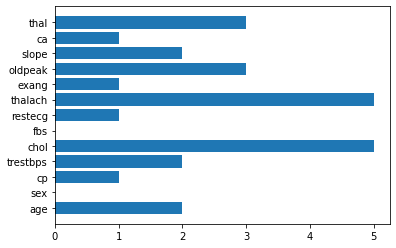

In [ ]:
import matplotlib.pyplot as plt

horiz = np.array(ft)
height = np.array(ft_val)

plt.barh(horiz, height)
plt.show()

## Question 4
implement the AdaBooest algorithm by using the CART you just implemented from question 2 as base learner. You should implement one arguments for the AdaBooest.
1. **n_estimators**: The maximum number of estimators at which boosting is terminated

### Question 4.1
Show the accuracy score of test data by `n_estimators=10` and `n_estimators=100`, respectively.


In [ ]:
# change target value 0 to -1
train_df_target = np.where(train_df_target == 0, -1, train_df_target)
test_df_target = np.where(test_df_target == 0, -1, test_df_target)

In [ ]:
# Decision stump used as weak classifier
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost:
    def __init__(self, n_estimators=5):
        self.n_estimators = n_estimators
        self.clfs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        # Iterate through classifiers
        for _ in range(self.n_estimators):
            clf = DecisionStump()
            min_error = float("inf")

            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

In [ ]:
# Fit model
clf_10ab = Adaboost( n_estimators = 10 )
clf_10ab.fit(train_df_data, train_df_target)

from sklearn.metrics import roc_auc_score
# Predict on test set
pred_target = clf_10ab.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)

print("AdaBoost Accuracy:", acc)

AdaBoost Accuracy: 0.83


In [ ]:
# Fit model
clf_100ab = Adaboost( n_estimators = 100 )
clf_100ab.fit(train_df_data, train_df_target)

from sklearn.metrics import roc_auc_score
# Predict on test set
pred_target = clf_100ab.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)

print("AdaBoost Accuracy:", acc)

AdaBoost Accuracy: 0.81


## Question 5
implement the Random Forest algorithm by using the CART you just implemented from question 2. You should implement three arguments for the Random Forest.

1. **n_estimators**: The number of trees in the forest. 
2. **max_features**: The number of random select features to consider when looking for the best split
3. **bootstrap**: Whether bootstrap samples are used when building tree


In [ ]:
from collections import Counter

class RandomForest:
    '''
    A class that implements Random Forest algorithm from scratch.
    '''
    def __init__(self, n_estimators, max_features, boostrap=True, criterion='gini', min_samples_split=2, max_depth=5):
        self.num_trees = n_estimators
        self.max_features = max_features
        self.boostrap = boostrap
        self.critersion = criterion
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # Will store individually trained decision trees
        self.decision_trees = []
        
    @staticmethod
    def _sample(X, y):
        '''
        Helper function used for boostrap sampling.
        
        :param X: np.array, features
        :param y: np.array, target
        :return: tuple (sample of features, sample of target)
        '''
        n_rows, n_cols = X.shape
        # Sample with replacement
        samples = np.random.choice(a=n_rows, size=n_rows, replace=True)
        return X[samples], y[samples]
        
    def fit(self, X, y):
        '''
        Trains a Random Forest classifier.
        
        :param X: np.array, features
        :param y: np.array, target
        :return: None
        '''
        # Reset
        if len(self.decision_trees) > 0:
            self.decision_trees = []
            
        # Build each tree of the forest
        num_built = 0
        while num_built < self.num_trees:
            try:
                #print(num_built)
                clf = DecisionTree( criterion=self.critersion, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split
                )
                
                # Obtain data sample
                if self.boostrap:
                    _X, _y = self._sample(X, y)
                # Train
                clf.fit(_X, _y)
                # Save the classifier
                self.decision_trees.append(clf)
                num_built += 1
            except Exception as e:
                continue
    
    def predict(self, X):
        '''
        Predicts class labels for new data instances.
        
        :param X: np.array, new instances to predict
        :return: 
        '''
        # Make predictions with every tree in the forest
        y = []
        for tree in self.decision_trees:
            y.append(tree.predict(X))
        
        # Reshape so we can find the most common value
        y = np.swapaxes(a=y, axis1=0, axis2=1)
        
        # Use majority voting for the final prediction
        predictions = []
        for preds in y:
            counter = Counter(preds)
            predictions.append(counter.most_common(1)[0][0])
        return predictions

### Question 5.1
Using `criterion=gini`, `max_depth=None`, `max_features=sqrt(n_features)`, showing the accuracy score of test data by `n_estimators=10` and `n_estimators=100`, respectively.


In [ ]:
# change target value back from -1 to 0
train_df_target = np.where(train_df_target == -1, 0, train_df_target)
test_df_target = np.where(test_df_target == -1, 0, test_df_target)

In [ ]:
clf_10tree = RandomForest(n_estimators=10, max_features=np.sqrt(train_df_data.shape[1]))
clf_10tree.fit(train_df_data, train_df_target)
pred_target = clf_10tree.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)
print('RandomForest accuracy: ',acc)

RandomForest accuracy:  0.7


In [ ]:
clf_100tree = RandomForest(n_estimators=100, max_features=np.sqrt(train_df_data.shape[1]))
clf_100tree.fit(train_df_data, train_df_target)
pred_target = clf_100tree.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)
print('RandomForest accuracy: ',acc)

RandomForest accuracy:  0.8


### Question 5.2
Using `criterion=gini`, `max_depth=None`, `n_estimators=10`, showing the accuracy score of test data by `max_features=sqrt(n_features)` and `max_features=n_features`, respectively.


In [ ]:
clf_random_features = RandomForest(n_estimators=10, max_features=np.sqrt(train_df_data.shape[1]))
clf_random_features.fit(train_df_data, train_df_target)
pred_target = clf_random_features.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)
print('RandomForest accuracy: ',acc)

RandomForest accuracy:  0.8


In [ ]:
clf_all_features = RandomForest(n_estimators=10, max_features=train_df_data.shape[1])
clf_all_features.fit(train_df_data, train_df_target)
pred_target = clf_all_features.predict(test_df_data)
acc = accuracy_score(test_df_target, pred_target)
print('RandomForest accuracy: ',acc)

RandomForest accuracy:  0.77


- Note: Use majority votes to get the final prediction, you may get slightly different results when re-building the random forest model

### Question 6.
Try you best to get highest test accuracy score by 
- Feature engineering
- Hyperparameter tuning
- Implement any other ensemble methods, such as gradient boosting. Please note that you cannot call any package. Also, only ensemble method can be used. Neural network method is not allowed to used.

## Helper function

In [ ]:
class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

In [ ]:
class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()

    def gradient(self, y, y_pred):
        raise NotImplementedError()

    def acc(self, y, y_pred):
        return 0

class SquareLoss(Loss):
    def __init__(self): pass

    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)

    def gradient(self, y, y_pred):
        return -(y - y_pred)

class CrossEntropy(Loss):
    def __init__(self): pass

    def loss(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)

    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

    def gradient(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)

In [ ]:
def calculate_variance(X):
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance

In [ ]:
def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

In [ ]:
def divide_on_feature(X, feature_i, threshold):
    """ Divide dataset based on if sample value on feature index is larger than
        the given threshold """
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])

    return np.array([X_1, X_2])

## New Decision tree model for Gradient Boosting

In [ ]:
class DecisionNode():
    """Class that represents a decision node or leaf in the decision tree
    Parameters:
    -----------
    feature_i: int
        Feature index which we want to use as the threshold measure.
    threshold: float
        The value that we will compare feature values at feature_i against to
        determine the prediction.
    value: float
        The class prediction if classification tree, or float value if regression tree.
    true_branch: DecisionNode
        Next decision node for samples where features value met the threshold.
    false_branch: DecisionNode
        Next decision node for samples where features value did not meet the threshold.
    """
    def __init__(self, feature_i=None, threshold=None,
                 value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i          # Index for the feature that is tested
        self.threshold = threshold          # Threshold value for feature
        self.value = value                  # Value if the node is a leaf in the tree
        self.true_branch = true_branch      # 'Left' subtree
        self.false_branch = false_branch    # 'Right' subtree


# Super class of RegressionTree and ClassificationTree
class DecisionTree(object):
    """Super class of RegressionTree and ClassificationTree.
    Parameters:
    -----------
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further.
    max_depth: int
        The maximum depth of a tree.
    loss: function
        Loss function that is used for Gradient Boosting models to calculate impurity.
    """
    def __init__(self, min_samples_split=2, min_impurity=1e-7,
                 max_depth=float("inf"), loss=None):
        self.root = None  # Root node in dec. tree
        # Minimum n of samples to justify split
        self.min_samples_split = min_samples_split
        # The minimum impurity to justify split
        self.min_impurity = min_impurity
        # The maximum depth to grow the tree to
        self.max_depth = max_depth
        # Function to calculate impurity (classif.=>info gain, regr=>variance reduct.)
        self._impurity_calculation = None
        # Function to determine prediction of y at leaf
        self._leaf_value_calculation = None
        # If y is one-hot encoded (multi-dim) or not (one-dim)
        self.one_dim = None
        # If Gradient Boost
        self.loss = loss

    def fit(self, X, y, loss=None):
        """ Build decision tree """
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """ Recursive method which builds out the decision tree and splits X and respective y
        on the feature of X which (based on impurity) best separates the data"""

        largest_impurity = 0
        best_criteria = None    # Feature index and threshold
        best_sets = None        # Subsets of the data

        # Check if expansion of y is needed
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Calculate the impurity for each feature
            for feature_i in range(n_features):
                # All values of feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                # Iterate through all unique values of feature column i and
                # calculate the impurity
                for threshold in unique_values:
                    # Divide X and y depending on if the feature value of X at index feature_i
                    # meets the threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Select the y-values of the two sets
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Calculate impurity
                        impurity = self._impurity_calculation(y, y1, y2)

                        # If this threshold resulted in a higher information gain than previously
                        # recorded save the threshold value and the feature
                        # index
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   # X of left subtree
                                "lefty": Xy1[:, n_features:],   # y of left subtree
                                "rightX": Xy2[:, :n_features],  # X of right subtree
                                "righty": Xy2[:, n_features:]   # y of right subtree
                                }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # We're at leaf => determine value
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)


    def predict_value(self, x, tree=None):
        """ Do a recursive search down the tree and make a prediction of the data sample by the
            value of the leaf that we end up at """

        if tree is None:
            tree = self.root

        # If we have a value (i.e we're at a leaf) => return value as the prediction
        if tree.value is not None:
            return tree.value

        # Choose the feature that we will test
        feature_value = x[tree.feature_i]

        # Determine if we will follow left or right branch
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Test subtree
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Classify samples one by one and return the set of labels """
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred

    def print_tree(self, tree=None, indent=" "):
        """ Recursively print the decision tree """
        if not tree:
            tree = self.root

        # If we're at leaf => print the label
        if tree.value is not None:
            print (tree.value)
        # Go deeper down the tree
        else:
            # Print test
            print ("%s:%s? " % (tree.feature_i, tree.threshold))
            # Print the true scenario
            print ("%sT->" % (indent), end="")
            self.print_tree(tree.true_branch, indent + indent)
            # Print the false scenario
            print ("%sF->" % (indent), end="")
            self.print_tree(tree.false_branch, indent + indent)

## Regression Tree

In [ ]:
class RegressionTree(DecisionTree):

    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # Calculate the variance reduction
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

## Gradient Boosting model

In [ ]:
class GradientBoosting(object):
    """Super class of GradientBoostingClassifier and GradientBoostinRegressor. 
    Uses a collection of regression trees that trains on predicting the gradient
    of the loss function. 
    Parameters:
    -----------
    n_estimators: int
        The number of classification trees that are used.
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further. 
    max_depth: int
        The maximum depth of a tree.
    regression: boolean
        True or false depending on if we're doing regression or classification.
    """
    def __init__(self, n_estimators=100, learning_rate=0.1, min_samples_split=2,
                 min_impurity=1e-7, max_depth=3, regression=False):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self.regression = regression
        #self.bar = progressbar.ProgressBar(widgets=bar_widgets)
        
        # Square loss for regression
        # Log loss for classification
        self.loss = SquareLoss()
        if not self.regression:
            self.loss = CrossEntropy()

        # Initialize regression trees
        self.trees = []
        for i in range(n_estimators):
            tree = RegressionTree(
                    min_samples_split=self.min_samples_split,
                    min_impurity=self.min_impurity,
                    max_depth=self.max_depth)
            self.trees.append(tree)


    def fit(self, X, y):
        np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
        y_pred = np.full(np.shape(y), np.mean(y, axis=0))
        #for i in self.bar(range(self.n_estimators)):
        for i in range(self.n_estimators):
            gradient = self.loss.gradient(y, y_pred)
            self.trees[i].fit(X, gradient)
            update = self.trees[i].predict(X)
            # Update y prediction
            y_pred -= np.multiply(self.learning_rate, update)
        


    def predict(self, X):
        y_pred = np.array([])
        # Make predictions
        for tree in self.trees:
            update = tree.predict(X)
            update = np.multiply(self.learning_rate, update)
            y_pred = -update if not y_pred.any() else y_pred - update

        if not self.regression:
            '''
            # Turn into probability distribution
            print(np.exp(y_pred))
            print(np.sum(np.exp(y_pred)))
            print(np.expand_dims(np.sum(np.exp(y_pred)), axis=1))
            y_pred = np.exp(y_pred) / np.expand_dims(np.sum(np.exp(y_pred)), axis=1)
            

            
            # Set label to the value that maximizes probability
            #y_pred = np.argmax(y_pred, axis=1)
            #print(y_pred)
            
            '''
            y_pred_list = y_pred.tolist()
            temp = []
            for i in y_pred_list:
                if i>1:
                    temp.append(1)
                else:   temp.append(0)
            y_pred = np.array(temp)
        return y_pred

## Run Gradient Boosting with Our dataset

In [ ]:
from sklearn.metrics import accuracy_score

clf_gbc = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
clf_gbc.fit(train_df_data, train_df_target)
test_preds = clf_gbc.predict(test_df_data)

print('Gradient Boosting Accuarcy score: ', accuracy_score(test_df_target, test_preds))


Gradient Boosting Accuarcy score:  0.8


## Hyperparameter tuning

In [ ]:
parameters = {
    "n_estimators":[5,10,15,20,25,30,45,50,100,200],
    "max_depth":[1,2,3,4,5],
    "learning_rate":[0.01,0.05,0.1,0.25,0.5,1]
}
max_acc_score = 0
best_n_estimators = 5
for n_estimators in parameters["n_estimators"]:
    clf_gbc = GradientBoosting(n_estimators=n_estimators)
    clf_gbc.fit(train_df_data, train_df_target)
    test_preds = clf_gbc.predict(test_df_data)
    acc = accuracy_score(test_df_target, test_preds)
    if acc > max_acc_score:
          max_acc_score = acc
          best_n_estimators = n_estimators
best_max_depth = 1
for max_depth in parameters["max_depth"]:
    clf_gbc = GradientBoosting(n_estimators=best_n_estimators, max_depth=max_depth)
    clf_gbc.fit(train_df_data, train_df_target)
    test_preds = clf_gbc.predict(test_df_data)
    acc = accuracy_score(test_df_target, test_preds)
    if acc > max_acc_score:
          max_acc_score = acc
          best_max_depth = max_depth

best_learning_rate = 0.01
for learning_rate in parameters["learning_rate"]:
    clf_gbc = GradientBoosting(n_estimators=best_n_estimators, learning_rate=learning_rate, max_depth=best_max_depth)
    clf_gbc.fit(train_df_data, train_df_target)
    test_preds = clf_gbc.predict(test_df_data)
    acc = accuracy_score(test_df_target, test_preds)
    if acc > max_acc_score:
          max_acc_score = acc
          best_learning_rate = learning_rate
print('best Gradient Boosting accuracy: ',max_acc_score)
print('best n estimators: ',best_n_estimators)
print('best max depth: ',best_max_depth)
print('best learning rate',best_learning_rate)

best Gradient Boosting accuracy:  0.8
best n estimators:  5
best max depth:  1
best learning rate 0.01


## Compare our model with sklearn.ensemble GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc_sklearn = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(train_df_data, train_df_target)
test_preds = clf_gbc_sklearn.predict(test_df_data)
print('sklearn Gradient Boosting accuarcy score: ', accuracy_score(test_df_target, test_preds))

sklearn Gradient Boosting accuarcy score:  0.79


In [ ]:
parameters = {
    "n_estimators":[5,10,15,20,25,30,45,50],
    "max_depth":[1,2,3,4,5],
    "learning_rate":[0.01,0.05,0.1,0.25,0.5,1]
}
max_acc_score = 0
best_n_estimators = 5
for n_estimators in parameters["n_estimators"]:
    clf_gbc_sklearn = GradientBoostingClassifier(n_estimators=n_estimators)
    clf_gbc_sklearn.fit(train_df_data, train_df_target)
    test_preds = clf_gbc_sklearn.predict(test_df_data)
    acc = accuracy_score(test_df_target, test_preds)
    if acc > max_acc_score:
          max_acc_score = acc
          best_n_estimators = n_estimators
best_max_depth = 1
for max_depth in parameters["max_depth"]:
    clf_gbc_sklearn = GradientBoostingClassifier(n_estimators=best_n_estimators, max_depth=max_depth)
    clf_gbc_sklearn.fit(train_df_data, train_df_target)
    test_preds = clf_gbc_sklearn.predict(test_df_data)
    acc = accuracy_score(test_df_target, test_preds)
    if acc > max_acc_score:
          max_acc_score = acc
          best_max_depth = max_depth

best_learning_rate = 0.01
for learning_rate in parameters["learning_rate"]:
    clf_gbc_sklearn = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=learning_rate, max_depth=best_max_depth)
    clf_gbc_sklearn.fit(train_df_data, train_df_target)
    test_preds = clf_gbc_sklearn.predict(test_df_data)
    acc = accuracy_score(test_df_target, test_preds)
    if acc > max_acc_score:
          max_acc_score = acc
          best_learning_rate = learning_rate
print('best sklearn Gradient Boosting accuracy: ',max_acc_score)
print('best n estimators: ',best_n_estimators)
print('best max depth: ',best_max_depth)
print('best learning rate',best_learning_rate)

best sklearn Gradient Boosting accuracy:  0.83
best n estimators:  25
best max depth:  1
best learning rate 0.01


## Supplementary
If you have trouble to implement this homework, TA strongly recommend watching [this video](https://www.youtube.com/watch?v=LDRbO9a6XPU), which explains Decision Tree model clearly. But don't copy code from any resources, try to finish this homework by yourself! 